In [1]:
#A typical organization loses an estimated 5% of its yearly revenue to fraud. In this course, you will learn how to fight fraud by using data. For example, you'll learn how to apply supervised learning algorithms to detect fraudulent behavior similar to past ones, as well as unsupervised learning methods to discover new types of fraud activities. Moreover, in fraud analytics you often deal with highly imbalanced datasets when classifying fraud versus non-fraud, and during this course you will pick up some techniques on how to deal with that. The course provides a mix of technical and theoretical insights and shows you hands-on how to practically implement fraud detection models. In addition, you will get tips and advice from real-life experience to help you prevent making common mistakes in fraud analytics.

In [3]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv("CreditCard.csv")

In [5]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.191668,0.428409,1.640028,-1.848859,-0.870903,-0.204849,-0.385675,0.352793,-1.098301,-0.334597,...,0.507173,1.292565,-0.467752,1.244887,0.697707,0.059375,-0.319964,-0.017444,27.44,0
1,1.966614,-0.450087,-1.228586,0.142873,-0.150627,-0.543590,-0.076217,-0.108390,0.973310,-0.029903,...,0.124055,0.564916,-0.039331,-0.283904,0.186400,0.192932,-0.039155,-0.071314,35.95,0
2,1.528452,-1.296191,-0.890677,-2.504028,0.803202,3.350793,-1.633016,0.815350,-1.884692,1.465259,...,-0.412088,-1.017485,0.129566,0.948048,0.287826,-0.396592,0.042997,0.025853,28.40,0
3,-0.774614,1.100916,0.679080,1.034016,0.168633,0.874582,0.209454,0.770550,-0.558106,-0.165442,...,0.011158,0.146017,-0.130401,-0.848815,0.005698,-0.183295,0.282940,0.123856,43.20,0
4,-1.075860,1.361160,1.496972,2.242604,1.314751,0.272787,1.005246,0.132932,-1.558317,0.484216,...,0.254485,0.530692,-0.651119,0.626389,1.040212,0.249501,-0.146745,0.029714,10.59,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7300 entries, 0 to 7299
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      7300 non-null   float64
 1   V2      7300 non-null   float64
 2   V3      7300 non-null   float64
 3   V4      7300 non-null   float64
 4   V5      7300 non-null   float64
 5   V6      7300 non-null   float64
 6   V7      7300 non-null   float64
 7   V8      7300 non-null   float64
 8   V9      7300 non-null   float64
 9   V10     7300 non-null   float64
 10  V11     7300 non-null   float64
 11  V12     7300 non-null   float64
 12  V13     7300 non-null   float64
 13  V14     7300 non-null   float64
 14  V15     7300 non-null   float64
 15  V16     7300 non-null   float64
 16  V17     7300 non-null   float64
 17  V18     7300 non-null   float64
 18  V19     7300 non-null   float64
 19  V20     7300 non-null   float64
 20  V21     7300 non-null   float64
 21  V22     7300 non-null   float64
 22  

In [7]:
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000,...,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000
mean,-0.193825,0.159880,-0.278411,0.193200,-0.128358,-0.048911,-0.202722,0.029468,-0.099865,-0.219260,...,0.033059,-0.003541,0.004062,-0.001630,-0.001130,0.011666,0.009332,0.005830,90.372956,0.041096
std,2.521772,1.970007,2.488454,1.746604,1.826802,1.371383,2.175403,1.764826,1.307587,1.863682,...,1.071380,0.778235,0.654663,0.597398,0.531629,0.484641,0.464333,0.330659,289.206749,0.198526
min,-31.972536,-42.172688,-31.103685,-5.047408,-28.815577,-8.389238,-43.557242,-41.044261,-13.320155,-24.588262,...,-22.797604,-8.887017,-17.530682,-2.822684,-4.547278,-1.577118,-7.263482,-3.916662,0.000000,0.000000
25%,-0.995027,-0.550039,-1.029977,-0.796602,-0.737594,-0.801558,-0.602338,-0.199438,-0.708590,-0.580755,...,-0.232682,-0.543785,-0.165239,-0.356176,-0.320517,-0.317820,-0.070511,-0.054776,5.000000,0.000000
50%,-0.081147,0.103165,0.112765,0.050026,-0.056608,-0.300839,0.031776,0.033797,-0.086823,-0.100473,...,-0.020227,0.007343,-0.012333,0.038141,0.013887,-0.035643,0.006109,0.012170,21.855000,0.000000
75%,1.291141,0.884756,1.012824,0.871857,0.616391,0.380007,0.558040,0.352100,0.583610,0.412193,...,0.200228,0.528939,0.146370,0.428241,0.351934,0.270810,0.106617,0.083614,76.000000,0.000000
max,2.446505,22.057729,3.757300,12.132323,12.791416,21.190194,26.249717,20.007208,8.141560,12.901627,...,27.202839,8.316275,13.218751,3.437028,3.590787,3.116200,5.058448,15.124103,12910.930000,1.000000


In [12]:
print(len(data.index))
print(len(data.columns))

7300
30


In [9]:
data.shape

(7300, 30)

In [10]:
# Count the occurrences of fraud and no fraud and print them
occ = data['Class'].value_counts()
print(occ)

# Print the ratio of fraud cases
print(occ /len(data.index) )

0    7000
1     300
Name: Class, dtype: int64
0    0.958904
1    0.041096
Name: Class, dtype: float64


In [16]:
def prep_data(df: pd.DataFrame) -> (np.ndarray, np.ndarray):
#-> (np.ndarray, np.ndarray):
   # Convert the DataFrame into two variable
   # X: data columns (V1 - V28)
    #y: lable column
    X = df.iloc[:, 2:30].values
    y = df.Class.values
    return X, y

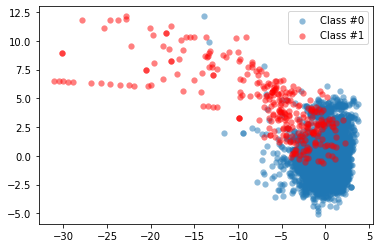

In [24]:
# Define a function to create a scatter plot of our data and labels
def plot_data(X, y):
	plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
	plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
	plt.legend()
	return plt.show()
# Create X and y from the prep_data function 
X, y = prep_data(data)

# Plot our data by running our plot data function on X and y
plot_data(X, y)

In [14]:
#Applying SMOTE

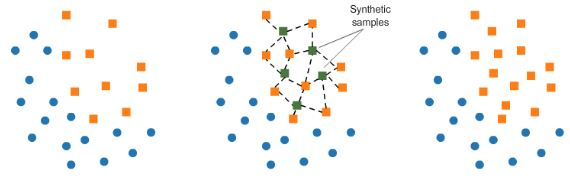

In [20]:
! pip install imblearn

In [21]:
!pip install SMOTE

In [13]:
#Compare SMOTE to original data
#You saw that using SMOTE suddenly gives us more observations of the minority class. Let's compare those results to our original data, to get a good feeling for what has actually happened. Let's have a look at the value counts again of our old and new data, and let's plot the two scatter plots of the data side by side. You'll use the function compare_plot() for that that, which takes the following arguments: X, y, X_resampled, y_resampled, method=''. The function plots your original data in a scatter plot, along with the resampled side by side.
#Instructions
#Print the value counts of our original labels, y. Be mindful that y is currently a Numpy array, so in order to use value counts, we'll assign y back as a pandas Series object.
#Repeat the step and print the value counts on y_resampled. This shows you how the balance between the two classes has changed with SMOTE.
#Use the compare_plot() function called on our original data as well our resampled data to see the scatterplots side by side.

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
from pprint import pprint as pp
import csv
from pathlib import Path
import seaborn as sns
from itertools import product
import string

import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.pipeline import Pipeline 

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.metrics import homogeneity_score, silhouette_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import MiniBatchKMeans, DBSCAN
from sklearn.utils import resample

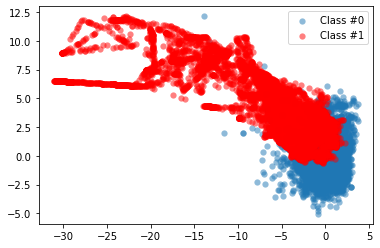

In [25]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
# Run the prep_data function
X, y = prep_data(data)
# Define the resampling method
method = SMOTE()
# Create the resampled feature set
X_resampled, y_resampled = method.fit_resample(X, y)
# Plot the resampled data
plot_data(X_resampled, y_resampled)

In [34]:
X_resampled, y_resampled = method.fit_resample(X, y)
print(pd.value_counts(pd.Series(y_resampled)))

1    7000
0    7000
dtype: int64


In [26]:
def compare_plot(X: np.ndarray, y: np.ndarray, X_resampled: np.ndarray, y_resampled: np.ndarray, method: str):
    plt.subplot(1, 2, 1)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.title('Original Set')
    plt.subplot(1, 2, 2)
    plt.scatter(X_resampled[y_resampled == 0, 0], X_resampled[y_resampled == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X_resampled[y_resampled == 1, 0], X_resampled[y_resampled == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.title(method)
    plt.legend()
    plt.show()

0    7000
1     300
dtype: int64
1    7000
0    7000
dtype: int64


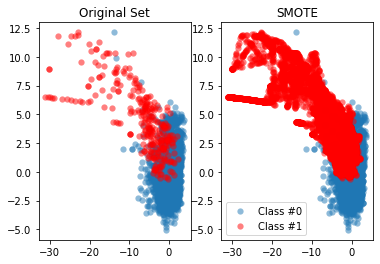

In [37]:
print(pd.value_counts(pd.Series(y)))
# Print the value_counts
print(pd.value_counts(pd.Series(y_resampled)))
# Run compare_plot
compare_plot(X, y,X_resampled, y_resampled, method='SMOTE')

In [12]:
#It should by now be clear that SMOTE has balanced our data completely, and that the minority class is now equal in size to the majority class. Visualizing the data shows the effect on the data very clearly.

In [27]:
data.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,0.010316,0.008078,0.014729,0.008060,0.015409,0.006414,0.034744,-0.004843,0.008350,0.021082,...,0.000334,0.002805,-0.006658,0.004198,0.001145,-0.001243,0.010977,0.004371,0.001989,89.084347
1,-4.957125,3.701927,-7.118341,4.513141,-3.482910,-1.339842,-5.743580,0.830079,-2.624878,-5.827242,...,0.332810,0.738976,0.069193,0.000879,-0.066388,0.001507,0.027739,0.125095,0.095441,120.440500


In [28]:
# Get the mean for each group
print(data.groupby(data.Class).mean())
# Implement a rule for stating which cases are flagged as fraud
data['flag_as_fraud'] = np.where(np.logical_and(data.V1<-3,data.V3<-5), 1, 0)
# Create a crosstab of flagged fraud cases versus the actual fraud cases
print(pd.crosstab(data.Class, data.flag_as_fraud, rownames=['Actual Fraud'], colnames=['Flagged Fraud']))

             V1        V2        V3        V4        V5        V6        V7  \
Class                                                                         
0      0.010316  0.008078  0.014729  0.008060  0.015409  0.006414  0.034744   
1     -4.957125  3.701927 -7.118341  4.513141 -3.482910 -1.339842 -5.743580   

             V8        V9       V10  ...       V20       V21       V22  \
Class                                ...                                 
0     -0.004843  0.008350  0.021082  ...  0.000334  0.002805 -0.006658   
1      0.830079 -2.624878 -5.827242  ...  0.332810  0.738976  0.069193   

            V23       V24       V25       V26       V27       V28      Amount  
Class                                                                          
0      0.004198  0.001145 -0.001243  0.010977  0.004371  0.001989   89.084347  
1      0.000879 -0.066388  0.001507  0.027739  0.125095  0.095441  120.440500  

[2 rows x 29 columns]
Flagged Fraud     0    1
Actual Fraud      

In [30]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [10]:
#With this rule, 110 cases of fraud are detected, 190 are not detected, and  33 false positives are identified.

In [11]:
#Using ML classification to catch fraud
# you'll see what happens when you use a simple machine learning model on our credit card data instead.
#Do you think you can beat those results? Remember, you've predicted 110 out 300, and had 33 false positives.
#So with that in mind, let's implement a Logistic Regression model. If you have taken the class on supervised learning in Python, you should be familiar with this model. If not, you might want to refresh that at this point. But don't worry, you'll be guided through the structure of the machine learning model.

In [31]:
X = data.iloc[:, 2:30].values
y = data.Class.values
# Create the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=0)
# Fit a logistic regression model to our data
model = LogisticRegression()
model.fit(X_train,y_train)
# Obtain model predictions
predicted = model.predict(X_test)
# Print the classifcation report and confusion matrix
print('Classification report:\n', classification_report(y_test,predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Classification report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1403
           1       1.00      0.84      0.91        57

    accuracy                           0.99      1460
   macro avg       1.00      0.92      0.96      1460
weighted avg       0.99      0.99      0.99      1460

Confusion matrix:
 [[1403    0]
 [   9   48]]


In [32]:
r2_score(y_test, predicted)

0.8356904377836966

In [34]:
# This is the pipeline module we need for this from imblearn
from imblearn.pipeline import Pipeline 
# Define which resampling method and which ML model to use in the pipeline
resampling=BorderlineSMOTE()
model = LogisticRegression()
# Define the pipeline, tell it to combine SMOTE with the Logistic Regression model
pipeline = Pipeline([('SMOTE', resampling), ('Logistic Regression', model)])

In [35]:
# Split your data X and y, into a training and a test set and fit the pipeline onto the training data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=0)

# Fit your pipeline onto your training set and obtain predictions by fitting the model onto the test data 
pipeline.fit(X_train, y_train) 
predicted = pipeline.predict(X_test)

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2099
           1       0.92      0.96      0.94        91

    accuracy                           0.99      2190
   macro avg       0.96      0.98      0.97      2190
weighted avg       0.99      0.99      0.99      2190

Confusion matrix:
 [[2091    8]
 [   4   87]]


In [36]:
#Natural hit rate
#You'll again use credit card transaction data, and the data is heavily imbalanced. We've given you features X and labels y to work with already, which are both numpy arrays.
#First you need to explore how prevalent fraud is in the dataset, to understand what the "natural accuracy" is, if we were to predict everything as non-fraud. It's is important to understand which level of "accuracy" you need to "beat" in order to get a better prediction than by doing nothing. In the following exercises, you'll create our first random forest classifier for fraud detection. That will serve as the "baseline" model.

In [37]:
# Count the total number of observations from the length of y
total_obs = len(y)
# Count the total number of non-fraudulent observations 
non_fraud =  [i for i in y if i == 0]
count_non_fraud = non_fraud.count(0)
# Calculate the percentage of non fraud observations in the dataset
percentage = (float(count_non_fraud)/float(total_obs)) * 100
# Print the percentage: this is our "natural accuracy" by doing nothing
print(f'{percentage:0.2f}%')

95.89%


In [ ]:
#Random Forest Classifier - part 1
#Let's now create a first random forest classifier for fraud detection. Hopefully you can do better than the baseline accuracy you've just calculated, which was roughly 96%. This model will serve as the "baseline" model that you're going to try to improve in the upcoming exercises. Let's start first with splitting the data into a test and training set, and defining the Random Forest model. The data available are features X and labels y.

In [38]:
# Import the random forest model from sklearn
from sklearn.ensemble import RandomForestClassifier
# Split your data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# Define the model as the random forest
model =  RandomForestClassifier(random_state=5)

In [ ]:
#Random Forest Classifier - part 2
#Let's see how our Random Forest model performs without doing anything special to it. The model from the previous exercise is available, and you've already split your data in X_train, y_train, X_test, y_test.

In [40]:
# Fit the model to our training set
model.fit(X_train, y_train)
# Obtain predictions from the test data 
predicted = model.predict(X_test)

In [41]:
# Fit the model to our training set
model.fit(X_train, y_train)
# Obtain predictions from the test data 
predicted = model.predict(X_test)
# Print the accuracy performance metric
print(accuracy_score(y_test,predicted))

1.0


In [ ]:
#Performance metrics for the RF model
#In the previous exercises you obtained an accuracy score for your random forest model. This time, we know accuracy can be misleading in the case of fraud detection. With highly imbalanced fraud data, the AUROC curve is a more reliable performance metric, used to compare different classifiers. Moreover, the classification report tells you about the precision and recall of your model, whilst the confusion matrix actually shows how many fraud cases you can predict correctly. So let's get these performance metrics.
#You'll continue working on the same random forest model from the previous exercise. Your model, defined as model = RandomForestClassifier(random_state=5) has been fitted to your training data already, and X_train, y_train, X_test, y_test are available.

In [42]:
# Import the packages to get the different performance metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
# Obtain the predictions from our random forest model 
predicted = model.predict(X_test)
# Predict probabilities
probs = model.predict_proba(X_test)
# Print the ROC curve, classification report and confusion matrix
print(roc_auc_score(y_test, probs[:,1]))
print(classification_report(y_test, predicted))
print(confusion_matrix(y_test, predicted))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2099
           1       1.00      1.00      1.00        91

    accuracy                           1.00      2190
   macro avg       1.00      1.00      1.00      2190
weighted avg       1.00      1.00      1.00      2190

[[2099    0]
 [   0   91]]


In [43]:
#Plotting the Precision Recall Curve
#You can also plot a Precision-Recall curve, to investigate the trade-off between the two in your model. In this curve Precision and Recall are inversely related; as Precision increases, Recall falls and vice-versa. A balance between these two needs to be achieved in your model, otherwise you might end up with many false positives, or not enough actual fraud cases caught. To achieve this and to compare performance, the precision-recall curves come in handy.
#Your Random Forest Classifier is available as model, and the predictions as predicted. You can simply obtain the average precision score and the PR curve from the sklearn package. The function plot_pr_curve() plots the results for you. Let's give it a try.

In [45]:
def plot_pr_curve(recall, precision, average_precision):
    """
    https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html
    """
    from inspect import signature
    plt.figure()
    step_kwargs = ({'step': 'post'}
                   if 'step' in signature(plt.fill_between).parameters
                   else {})
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.0])
    plt.xlim([0.0, 1.0])
    plt.title(f'2-class Precision-Recall curve: AP={average_precision:0.2f}')
    return plt.show()

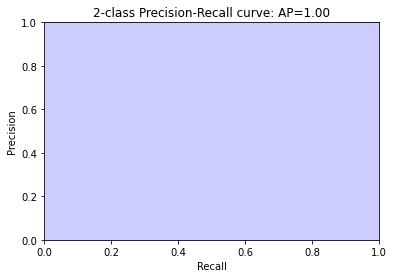

In [48]:
# Calculate average precision and the PR curve
average_precision = average_precision_score(y_test, predicted)
# Obtain precision and recall 
precision, recall,_= precision_recall_curve(y_test, predicted)
# Plot the recall precision tradeoff
plot_pr_curve(recall, precision, average_precision)

In [ ]:
#Model adjustments
#A simple way to adjust the random forest model to deal with highly imbalanced fraud data, is to use the class_weights option when defining your sklearn model. However, as you will see, it is a bit of a blunt force mechanism and might not work for your very special case.

In [50]:
# Define the model with balanced subsample
model = RandomForestClassifier(class_weight='balanced_subsample', random_state=5)
# Fit your training model to your training set
model.fit(X_train,y_train)
# Obtain the predicted values and probabilities from the model 
predicted = model.predict(X_test)
probs = model.predict_proba(X_test)
# Print the roc_auc_score, the classification report and confusion matrix
print(classification_report(y_test, predicted))
print(roc_auc_score(y_test,probs[:,1]))
print(confusion_matrix(y_test,predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2099
           1       1.00      1.00      1.00        91

    accuracy                           1.00      2190
   macro avg       1.00      1.00      1.00      2190
weighted avg       1.00      1.00      1.00      2190

1.0
[[2099    0]
 [   0   91]]


In [53]:
def get_model_results(X_train: np.ndarray, y_train: np.ndarray,
                      X_test: np.ndarray, y_test: np.ndarray, model):
    """
    model: sklearn model (e.g. RandomForestClassifier)
    """
    # Fit your training model to your training set
    model.fit(X_train, y_train)

    # Obtain the predicted values and probabilities from the model 
    predicted = model.predict(X_test)
    
    try:
        probs = model.predict_proba(X_test)
        print('ROC Score:')
        print(roc_auc_score(y_test, probs[:,1]))
    except AttributeError:
        pass

    # Print the ROC curve, classification report and confusion matrix
    print('\nClassification Report:')
    print(classification_report(y_test, predicted))
    print('\nConfusion Matrix:')
    print(confusion_matrix(y_test, predicted))

In [54]:
# Change the model options
model = RandomForestClassifier(bootstrap=True, class_weight={0:1, 1:12}, criterion='entropy',
# Change depth of model
max_depth=10,
# Change the number of samples in leaf nodes
 min_samples_leaf=10, 
# Change the number of trees to use
n_estimators=20, n_jobs=-1, random_state=5)
# Run the function get_model_results
get_model_results(X_train, y_train, X_test, y_test, model)

ROC Score:
0.9991989906234785

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2099
           1       0.96      0.86      0.91        91

    accuracy                           0.99      2190
   macro avg       0.98      0.93      0.95      2190
weighted avg       0.99      0.99      0.99      2190


Confusion Matrix:
[[2096    3]
 [  13   78]]


In [ ]:
#GridSearchCV to find optimal parameters
# you're going to tweak our model in a less "random" way, but use GridSearchCV to do the work for you.
#With GridSearchCV you can define which performance metric to score the options on. Since for fraud detection we are mostly interested in catching as many fraud cases as possible, you can optimize your model settings to get the best possible Recall score. If you also cared about reducing the number of false positives, you could optimize on F1-score, this gives you that nice Precision-Recall trade-off.
#GridSearchCV has already been imported from sklearn.model_selection, so let's give it a try!

In [55]:
# Define the parameter sets to test
param_grid = {'n_estimators': [1, 30], 'max_features': ['auto', 'log2'],  'max_depth': [4, 8], 'criterion': ['gini', 'entropy']
}
# Define the model to use
model = RandomForestClassifier(random_state=5)
# Combine the parameter sets with the defined model
CV_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)
# Fit the model to our training data and obtain best parameters
CV_model.fit(X_train,y_train)
CV_model.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 30}

In [ ]:
#Model results using GridSearchCV
#You discovered that the best parameters for your model are that the split criterion should be set to 'gini', the number of estimators (trees) should be 30, the maximum depth of the model should be 8 and the maximum features should be set to "log2".
#Let's give this a try and see how well our model performs. You can use the get_model_results() function again to save time.

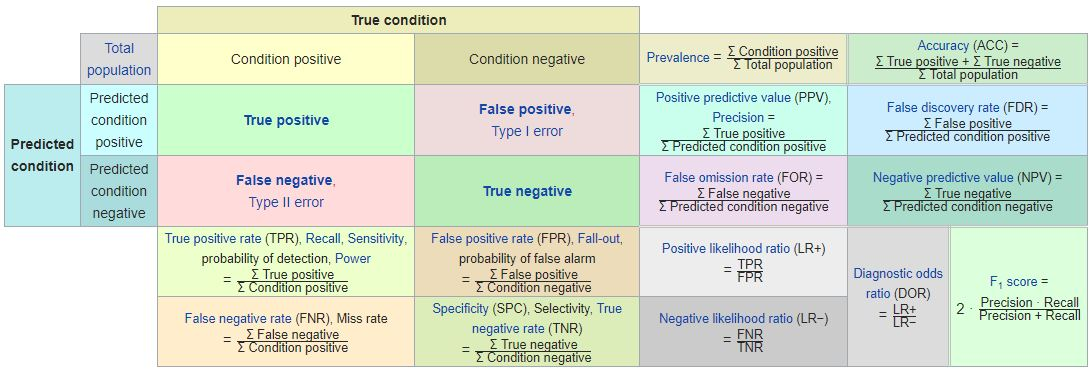

#Confusion Matrix
#False Positives (FP) / False Negatives (FN)
FN: predicts the person is not pregnant, but actually is
Cases of fraud not caught by the model
FP: predicts the person is pregnant, but actually is not
Cases of 'false alarm'
the business case determines whether FN or FP cases are more important
a credit card company might want to catch as much fraud as possible and reduce false negatives, as fraudulent transactions can be incredibly costly
a false alarm just means a transaction is blocked
an insurance company can't handle many false alarms, as it means getting a team of investigators involved for each positive prediction
True Positives / True Negatives are the cases predicted correctly (e.g. fraud / non-fraud)
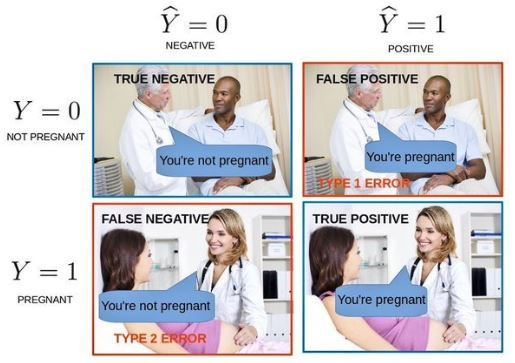

In [56]:
model = RandomForestClassifier(class_weight={0:1,1:12},criterion='gini',
                               max_depth=8,
                               max_features='log2', 
                               min_samples_leaf=10,
                               n_estimators=30,
                               n_jobs=-1,
                       random_state=5)
# Get results from your model
get_model_results(X_train,y_train,X_test,y_test,model)

ROC Score:
0.9998534100487412

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2099
           1       0.99      0.87      0.92        91

    accuracy                           0.99      2190
   macro avg       0.99      0.93      0.96      2190
weighted avg       0.99      0.99      0.99      2190


Confusion Matrix:
[[2098    1]
 [  12   79]]


In [ ]:
#Logistic Regression
# you'll combine three algorithms into one model with the VotingClassifier. This allows us to benefit from the different aspects from all models, and hopefully improve overall performance and detect more fraud. The first model, the Logistic Regression, has a slightly higher recall score than our optimal Random Forest model, but gives a lot more false positives. You'll also add a Decision Tree with balanced weights to it. The data is already split into a training and test set, i.e. X_train, y_train, X_test, y_test are available.
#In order to understand how the Voting Classifier can potentially improve your original model, you should check the standalone results of the Logistic Regression model first.

In [58]:
# Define the Logistic Regression model with weights
model = LogisticRegression(class_weight={0:1,1:15},random_state=5)
# Get the model results
get_model_results(X_train, y_train, X_test, y_test, model)

ROC Score:
0.9998481746933391

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2099
           1       0.95      1.00      0.97        91

    accuracy                           1.00      2190
   macro avg       0.97      1.00      0.99      2190
weighted avg       1.00      1.00      1.00      2190


Confusion Matrix:
[[2094    5]
 [   0   91]]


In [ ]:
#Voting Classifier
#Let's now combine three machine learning models into one, to improve our Random Forest fraud detection model from before. You'll combine our usual Random Forest model, with the Logistic Regression from the previous exercise, with a simple Decision Tree. You can use the short cut get_model_results() to see the immediate result of the ensemble model.

In [59]:
# Import the package
from sklearn.ensemble import VotingClassifier
# Define the three classifiers to use in the ensemble
clf1 = LogisticRegression(class_weight={0:1, 1:15}, random_state=5)
clf2 = RandomForestClassifier(class_weight={0:1, 1:12}, criterion='gini', max_depth=8, max_features='log2',
            min_samples_leaf=10, n_estimators=30, n_jobs=-1, random_state=5)
clf3 = DecisionTreeClassifier(random_state=5, class_weight="balanced")
# Combine the classifiers in the ensemble model
ensemble_model = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('dt',clf3)], voting='hard')
# Get the results 
get_model_results(X_train, y_train, X_test, y_test, ensemble_model)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2099
           1       0.99      1.00      0.99        91

    accuracy                           1.00      2190
   macro avg       0.99      1.00      1.00      2190
weighted avg       1.00      1.00      1.00      2190


Confusion Matrix:
[[2098    1]
 [   0   91]]


In [ ]:
#By combining the classifiers, you can take the best of multiple models. You've increased the cases of fraud you are catching from 79 to 91, and you only have 1 extra false positives in return. If you do care about catching as many fraud cases as you can, whilst keeping the false positives low, this is a pretty good trade-off. The Logistic Regression as a standalone was quite bad in terms of false positives, and the Random Forest was worse in terms of false negatives. By combining these together you indeed managed to improve performance.

In [ ]:
#Adjust weights within the Voting Classifier
#You've just seen that the Voting Classifier allows you to improve your fraud detection performance, by combining good aspects from multiple models. Now let's try to adjust the weights we give to these models. By increasing or decreasing weights you can play with how much emphasis you give to a particular model relative to the rest. This comes in handy when a certain model has overall better performance than the rest, but you still want to combine aspects of the others to further improve your results.

In [60]:
# Define the ensemble model
ensemble_model = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft', weights=[1, 4, 1], flatten_transform=True)
# Get results 
get_model_results(X_train, y_train, X_test, y_test, ensemble_model)

ROC Score:
1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2099
           1       1.00      1.00      1.00        91

    accuracy                           1.00      2190
   macro avg       1.00      1.00      1.00      2190
weighted avg       1.00      1.00      1.00      2190


Confusion Matrix:
[[2099    0]
 [   0   91]]


In [ ]:
#the weight option allows you to play with the individual models to get the best final mix for your fraud detection model. Now that you have finalized fraud detection with supervised learning, let's have a look at how fraud detetion can be done when you don't have any labels to train on.

In [ ]:
#Exploring your data
#you will be looking at bank payment transaction data. The financial transactions are categorized by type of expense, as well as the amount spent. Moreover, you have some client characteristics available such as age group and gender. Some of the transactions are labelled as fraud; you'll treat these labels as given and will use those to validate the results.
#When using unsupervised learning techniques for fraud detection, you want to distinguish normal from abnormal (thus potentially fraudulent) behavior. As a fraud analyst to understand what is "normal", you need to have a good understanding of the data and its characteristics. Let's explore the data in this first exercise.

In [63]:
# Get the dataframe shape
print(data.shape)
# Display the first 5 rows
data

(7300, 31)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,flag_as_fraud
0,-1.191668,0.428409,1.640028,-1.848859,-0.870903,-0.204849,-0.385675,0.352793,-1.098301,-0.334597,...,1.292565,-0.467752,1.244887,0.697707,0.059375,-0.319964,-0.017444,27.44,0,0
1,1.966614,-0.450087,-1.228586,0.142873,-0.150627,-0.543590,-0.076217,-0.108390,0.973310,-0.029903,...,0.564916,-0.039331,-0.283904,0.186400,0.192932,-0.039155,-0.071314,35.95,0,0
2,1.528452,-1.296191,-0.890677,-2.504028,0.803202,3.350793,-1.633016,0.815350,-1.884692,1.465259,...,-1.017485,0.129566,0.948048,0.287826,-0.396592,0.042997,0.025853,28.40,0,0
3,-0.774614,1.100916,0.679080,1.034016,0.168633,0.874582,0.209454,0.770550,-0.558106,-0.165442,...,0.146017,-0.130401,-0.848815,0.005698,-0.183295,0.282940,0.123856,43.20,0,0
4,-1.075860,1.361160,1.496972,2.242604,1.314751,0.272787,1.005246,0.132932,-1.558317,0.484216,...,0.530692,-0.651119,0.626389,1.040212,0.249501,-0.146745,0.029714,10.59,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7295,-3.593476,0.781442,-1.822448,0.605761,-1.194656,-0.517195,-1.722523,0.128890,0.014963,-2.856117,...,0.391249,-0.252875,-0.498042,0.010172,0.909929,-1.478767,0.722673,101.50,1,0
7296,0.923764,0.344048,-2.880004,1.721680,-3.019565,-0.639736,-3.801325,1.299096,0.864065,-2.895252,...,1.481271,0.725266,0.176960,-1.815638,-0.536517,0.489035,-0.049729,30.30,1,0
7297,-0.361428,1.133472,-2.971360,-0.283073,0.371452,-0.574680,4.031513,-0.934398,-0.768255,-2.248115,...,0.563861,-0.408436,-0.880079,1.408392,-0.137402,-0.001250,-0.182751,480.72,1,0
7298,-1.141559,1.927650,-3.905356,-0.073943,-0.044858,-1.756999,-1.217416,0.364563,-2.770148,-3.216188,...,-0.531496,-0.328741,0.393100,0.568435,0.786605,-0.146102,0.076211,25.00,1,0
